In [1]:
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)
import random
from  keras.preprocessing.image import save_img
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import io
import os
import yaml
from Util import *
from AdversarialAttack import *
from IPython import display
%matplotlib inline


In [2]:
#Global configuration
attackMode = 'Detection' #Raw: means without defense, Detection: With adversarial exmaples detection
queryBudgets = 1000 #Query Budgets
NumberOfTest = 20 #Number of test images
random.seed(42) #Set random seeds

violin: 0.99426466
cello: 0.0034391028
stage: 7.1690316e-05
jean: 3.6177233e-05
power_drill: 3.301604e-05
moving_van: 3.0205367e-05


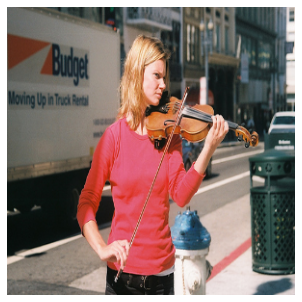

In [3]:
#Prepare test images
File,ImgPre = ResultSave('RayS','./Result/InceptionD')#Result saving folder and filename
ImgSet=[]
if os.path.isfile(File):
    HISTORY = LOAD(File)#Load Checkpoint
else:
    HISTORY = []
StartPoint=len(HISTORY)
for i in range(NumberOfTest):
    ImgSet.append(randomimg(mode=attackMode))
display_images(ImgSet[-1].img)


In [4]:
from RayS import RayS

In [5]:
#Run the experiments
constraint = np.inf#norm: 2; np.inf
for i in range(len(HISTORY),NumberOfTest):
    print("round "+str(i),end=': ')
    image = ImgSet[i]
    if i<StartPoint:
        continue
    with tf.device('/GPU:0'): 
        attack = RayS(image,order=np.inf, epsilon=0.3, early_stopping=False)
        timehistory,adversarial=attack.attack_hard_label(query_limit=queryBudgets)
    if not adversarial is None:
        np.save(ImgPre+str(i),adversarial)
    print('Attack result: L2:{0}, Linf:{1}'.format(image.maxl2,image.maxlinf))
    History=[image.historyl2,image.historylinf,timehistory]
    HISTORY.append(History)
    SAVE(File,HISTORY)
        

round 15: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:4.761600017547607, Linf:0.009503751993179321
round 16: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:0.7823077440261841, Linf:0.0015106499195098877
round 17: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:5.580852508544922, Linf:0.010793834924697876
round 18: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:3.586758852005005, Linf:0.006941318511962891
round 19: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:46.75482177734375, Linf:0.09143227338790894


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/server2080ti/anaconda3/envs/Adv/lib/python3.8/site-packages/lpips/weights/v0.1/alex.pth
(224, 2)
13
13.889670689900715
0.027338027954101562


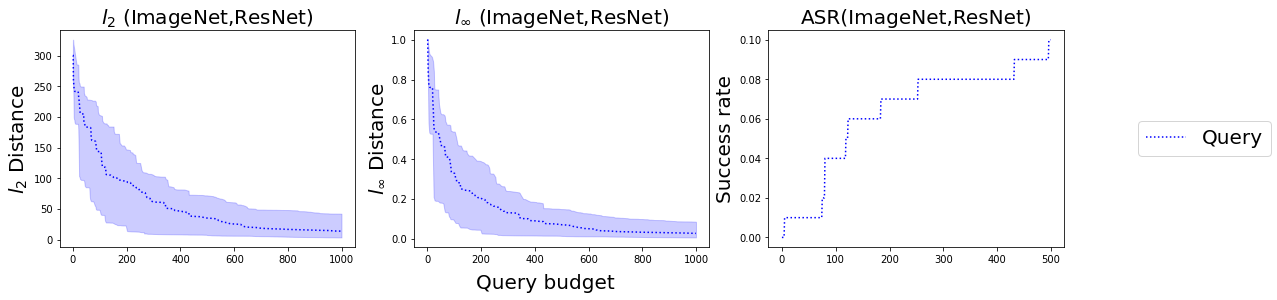

In [6]:
#Preview the results
from Visualization import Result
Valid=100
fontsize=20
vis = Result(filename = File,pref=ImgPre,color='b',label="Query",marker=None,linestyle=":")
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(18,4))

vis.Plot(0,Valid,1000,ax1)
ax1.set_title('$l_2$ (ImageNet,ResNet)',size=fontsize)
ax1.set_ylabel('$l_2$ Distance',size=fontsize)


vis.Plot(1,Valid,1000,ax2)
ax2.set_title('$l_\infty$ (ImageNet,ResNet)',size=fontsize)
ax2.set_ylabel('$l_\infty$ Distance',size=fontsize)

infT = 16.01/255

vis.ASR(1,Valid,500,infT,ax3)


ax3.set_title('ASR(ImageNet,ResNet)',size=fontsize)
ax3.set_ylabel('Success rate',size=fontsize)



fig.text(0.5, -0.00, 'Query budget', ha='center', va='center',fontsize=fontsize)

handles, labels = ax3.get_legend_handles_labels()

plt.legend(handles=handles,labels=labels,fontsize=fontsize,bbox_to_anchor=(1.7,0.5 ), loc=7, borderaxespad=0.)

In [7]:
print(File)

./Result/InceptionD/RayS.dat
